# Project: Housing Problem

Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the some region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

### Importing and Understanding Data

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm   
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
# Importing Housing.csv
housing = pd.read_csv('Housing.csv')

In [3]:
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


### Data Preparation

Convert Yes/No  to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [5]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [6]:
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


The variable 'furnishingstatus' had three levels. We need to convert it to integer.

In [7]:
# Creating a dummy variable for 'furnishingstatus'
status = pd.get_dummies(housing['furnishingstatus'])

In [8]:
# The result has created three variables that are not needed.
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [9]:
# we can use drop_first = True to drop the first column from status df.
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)

In [10]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,1
8,0,0
9,0,1


In [11]:
#Adding the results to the master dataframe
housing = pd.concat([housing,status],axis=1)

In [12]:
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished,0,1


In [13]:
# Dropping furnishingstatus as we have created the dummies for it
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [14]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Creating a new variable

In [15]:
#Create the new metric and assign it to "areaperbedroom"
housing['areaperbedroom'] = housing['area']/housing['bedrooms']

In [16]:
# Metric:bathrooms per bedroom
housing['bbratio'] = housing['bathrooms']/housing['bedrooms']

In [17]:
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.000000,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.000000,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.000000,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.000000,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.000000,0.250000
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1,0,2500.000000,1.000000
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1,0,2145.000000,0.750000
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,1,3240.000000,0.600000
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0,0,2025.000000,0.250000
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,1,1916.666667,0.666667


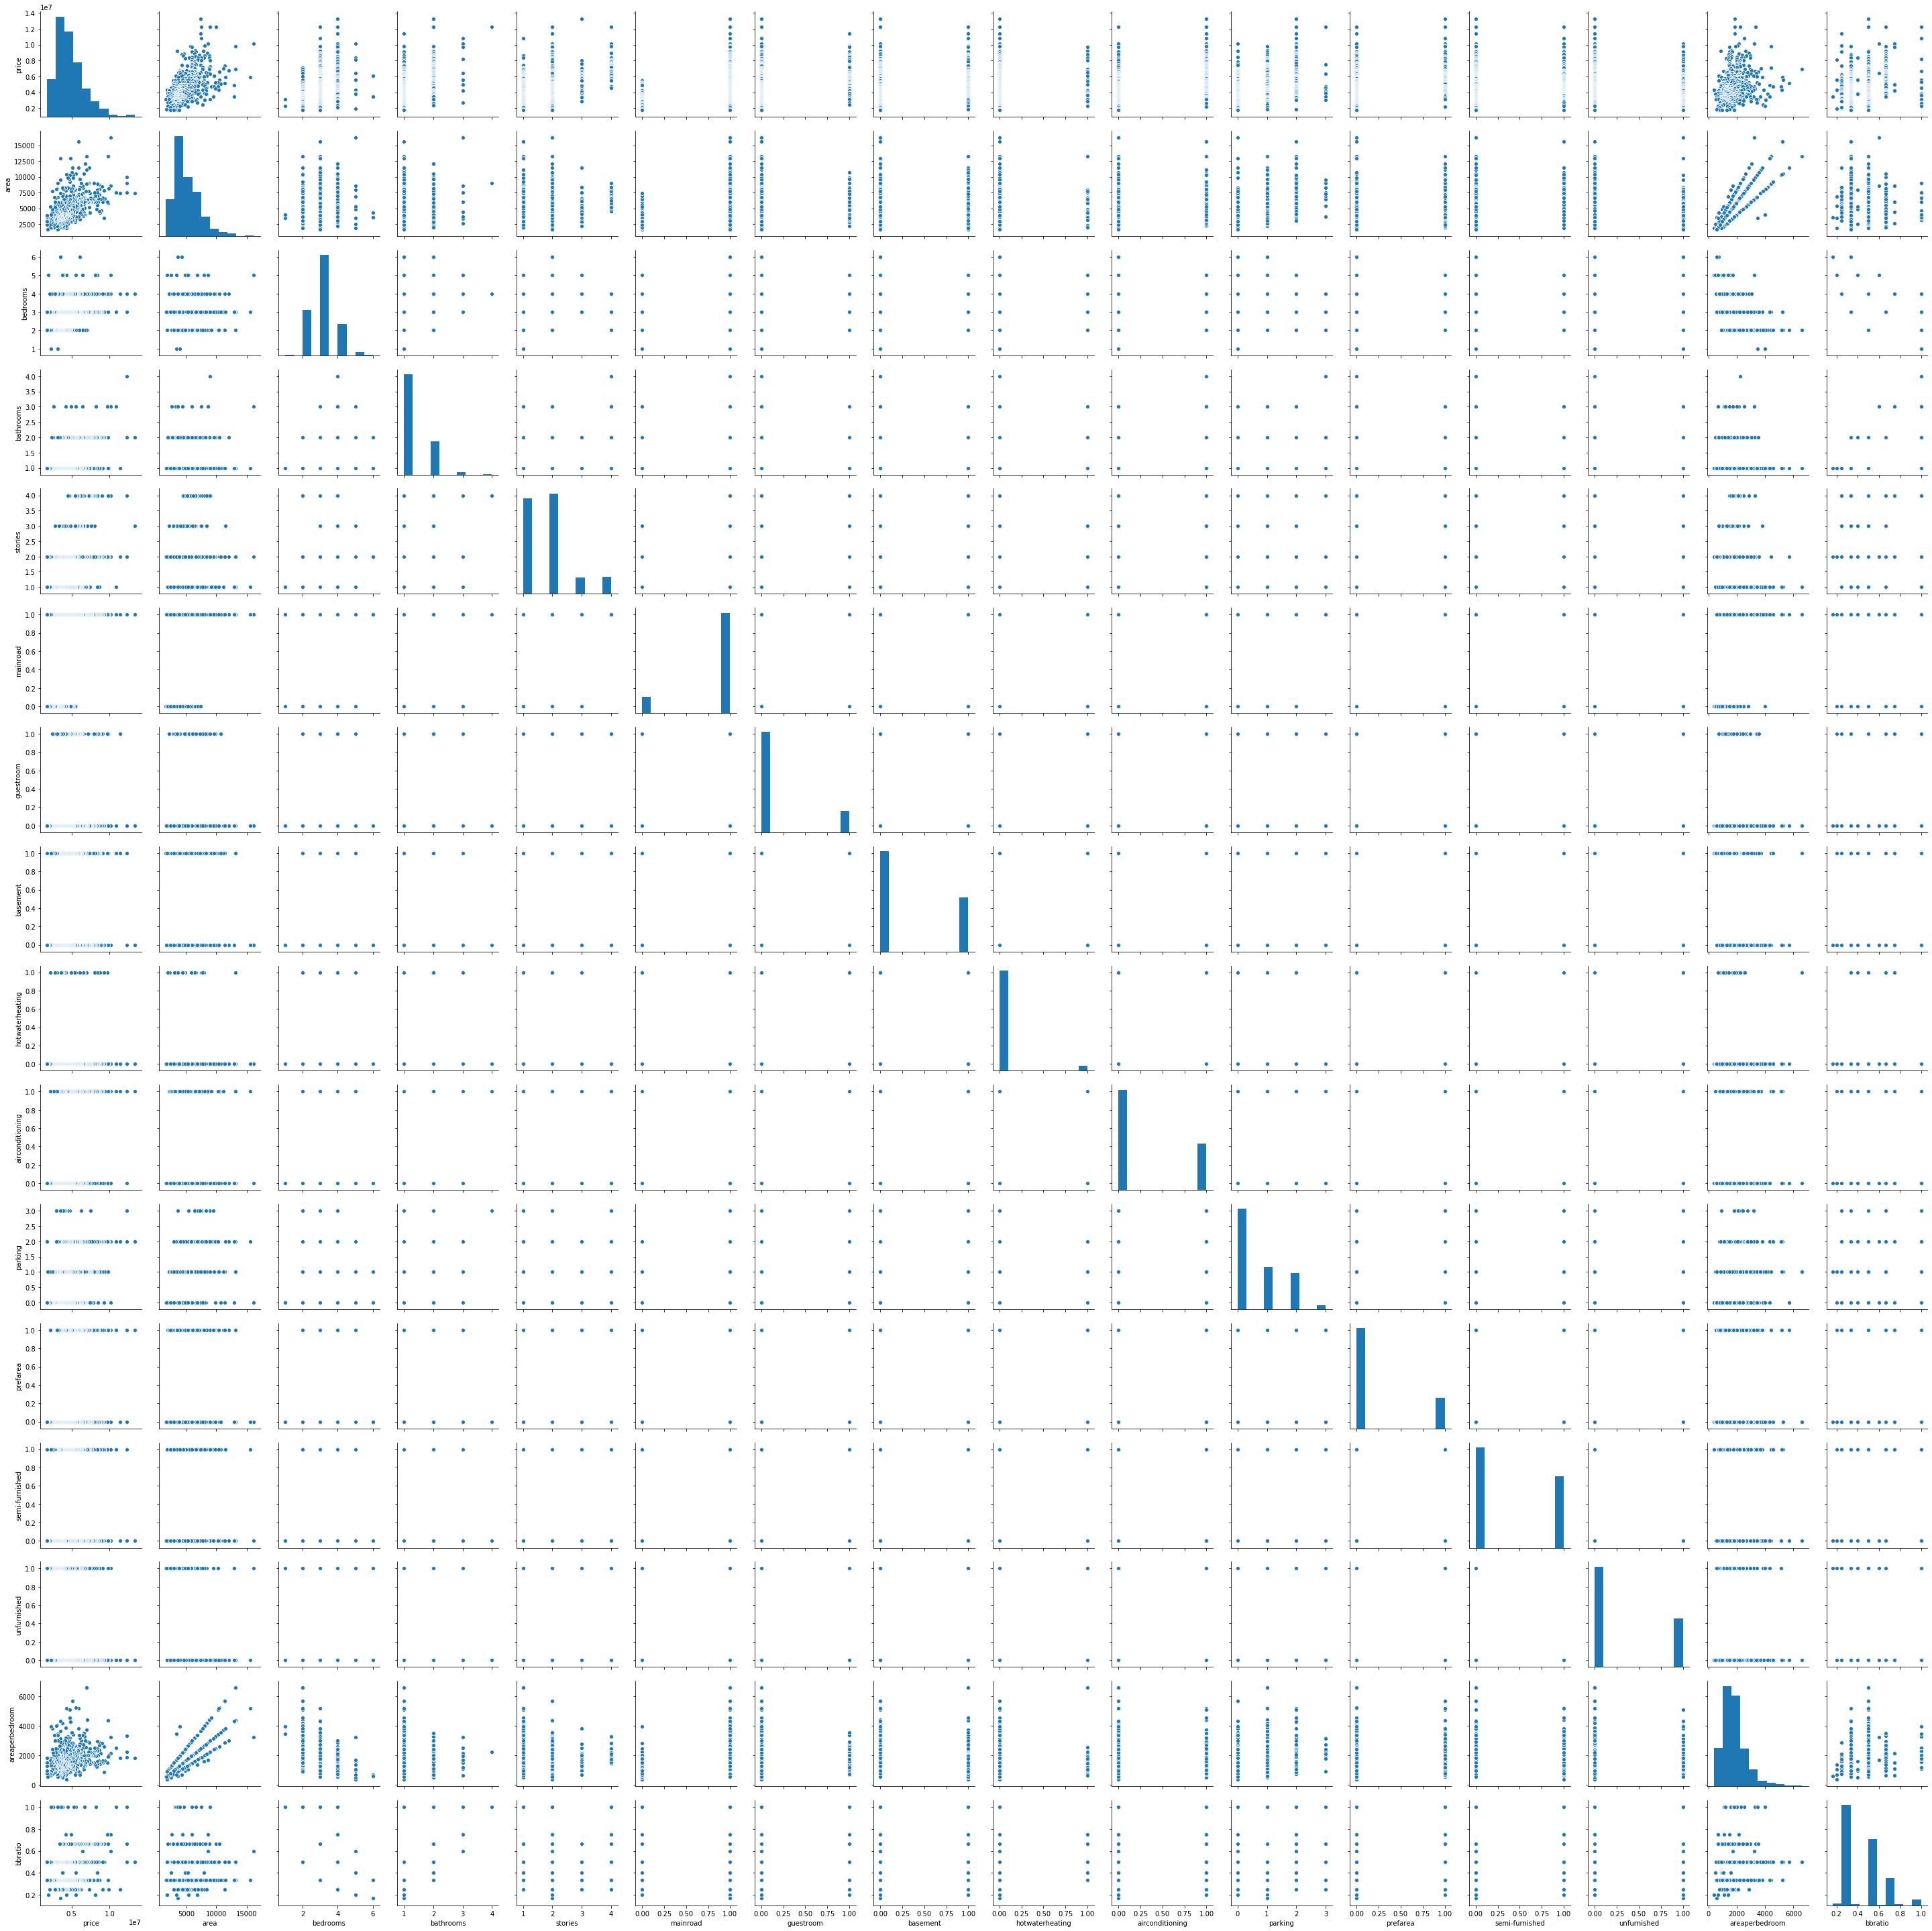

In [18]:
sns.pairplot(housing)

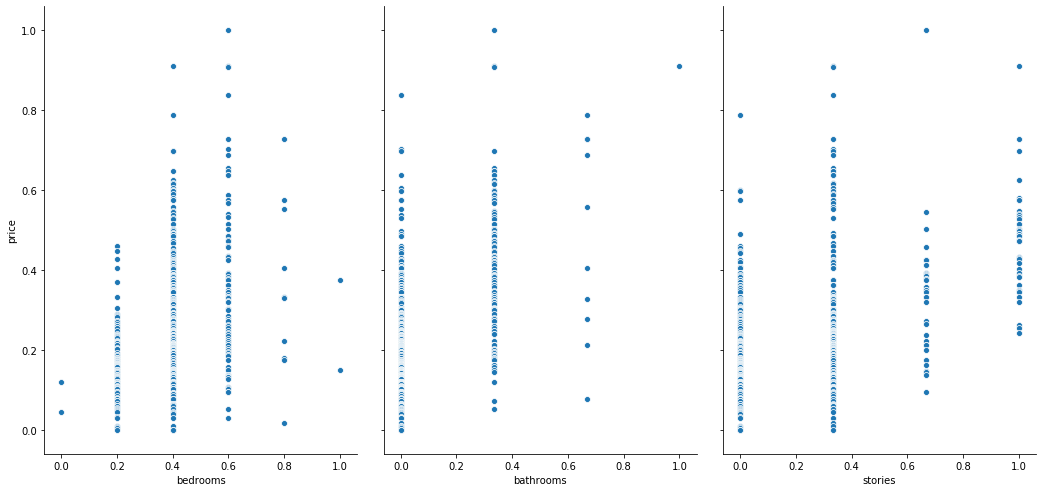

In [74]:
sns.pairplot(housing , x_vars=['bedrooms' , 'bathrooms','stories'] , y_vars='price', size=7 , aspect=0.7 , kind='scatter')

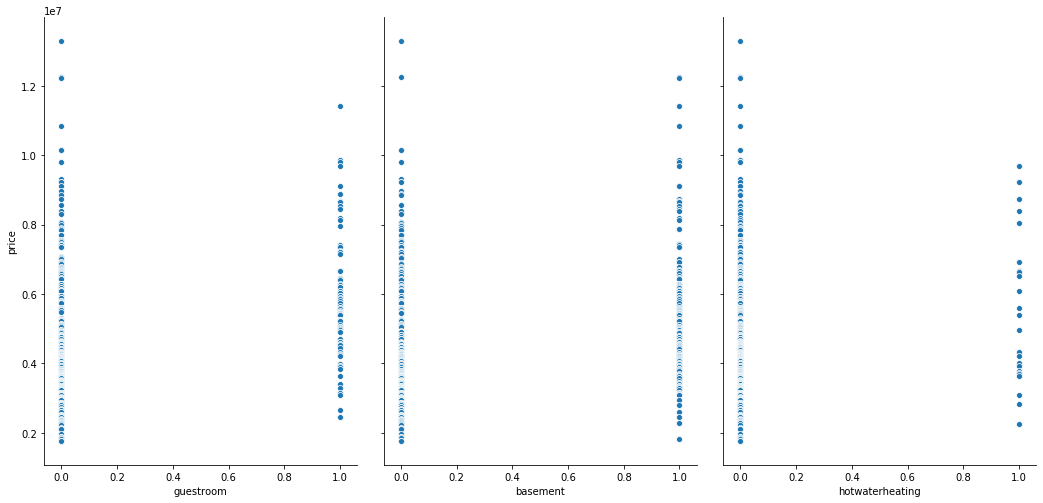

In [20]:
sns.pairplot(housing , x_vars=['guestroom' , 'basement','hotwaterheating'] , y_vars='price', size=7 , aspect=0.7 , kind='scatter')

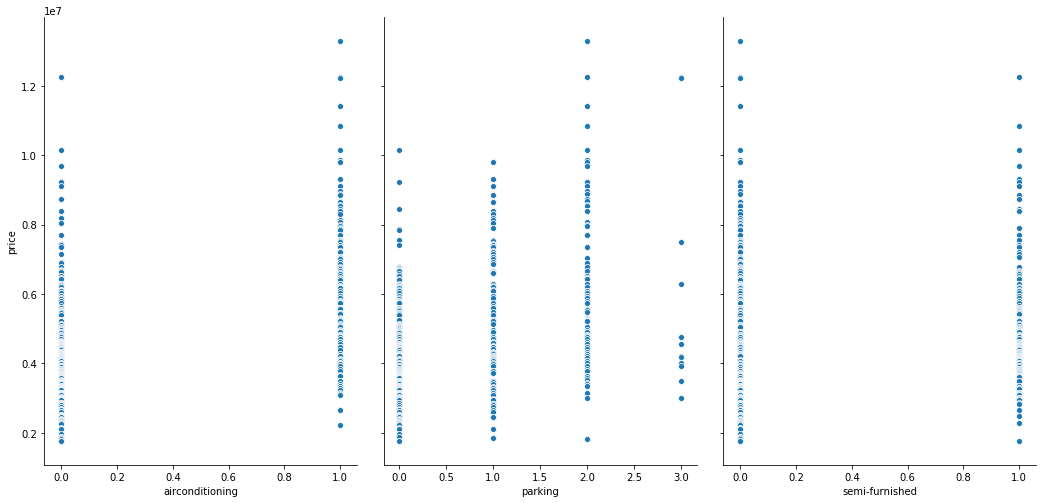

In [21]:
sns.pairplot(housing , x_vars=['airconditioning' , 'parking','semi-furnished'] , y_vars='price', size=7 , aspect=0.7 , kind='scatter')

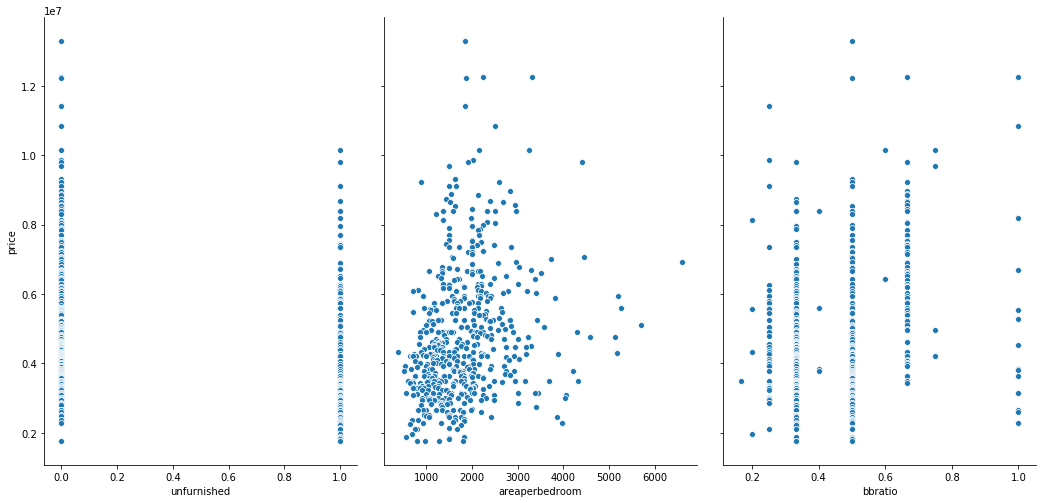

In [22]:
sns.pairplot(housing , x_vars=['unfurnished' , 'areaperbedroom','bbratio'] , y_vars='price', size=7 , aspect=0.7 , kind='scatter')

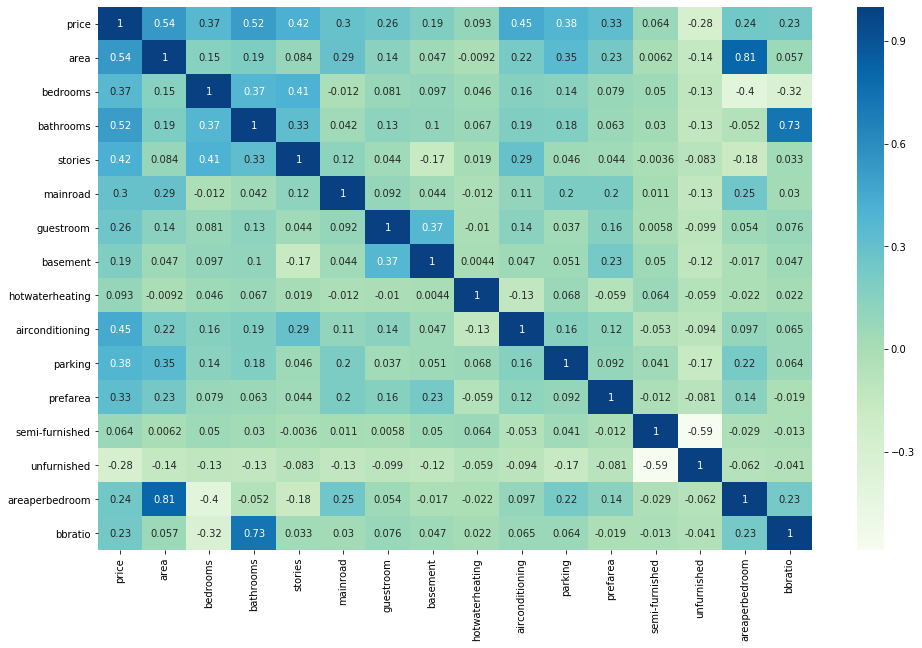

In [23]:
plt.figure(figsize = (16,10)) 
sns.heatmap(housing.corr() , annot = True , cmap = 'GnBu')

### Rescaling the Features 
It is extremely important to rescale the variables so that they have a comparable scale. 
There are two ways of rescaling 
1. Normalisation (min-max scaling) and 
2. standardisation (mean-o, sigma-1) 
Let's try normalisation

In [24]:
#defining a normalisation function 
def normalize (x): 
    return ((x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
housing = housing.apply(normalize) 

## Splitting Data into Training and Testing Sets

In [25]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [26]:
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

y = housing['price']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

## Building a linear model

In [72]:
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
lm_1 = sm.OLS(y_train,X_train).fit()

In [29]:
#Let's see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           4.56e-82
Time:                        14:35:02   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

### Checking VIF

In [30]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [31]:
# Calculating Vif value|
vif_cal(input_data=housing, dependent_col="price")

,Var,Vif
13,areaperbedroom,68.71
0,area,57.52
14,bbratio,29.25
2,bathrooms,11.11
1,bedrooms,10.68
4,mainroad,7.91
3,stories,2.81
11,semi-furnished,2.61
12,unfurnished,2.38
6,basement,2.05


## Correlation matrix

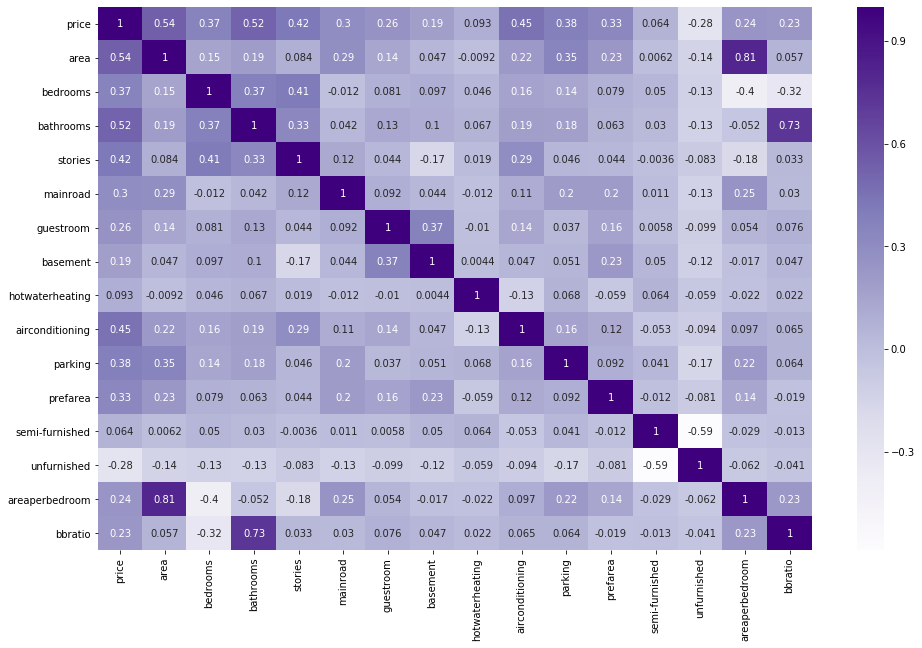

In [32]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(housing.corr(),annot = True , cmap = 'Purples')

### Dropping the Variable and Updating the Model

In [33]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('bbratio', 1)

In [34]:
lm_2 = sm.OLS(y_train,X_train).fit()

In [35]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           6.46e-83
Time:                        14:35:04   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0799      0.036     

### Dropping the Variable and Updating the Model

In [36]:
# Calculating Vif value
vif_cal(input_data = housing.drop(["bbratio"], axis=1), dependent_col = "price")

,Var,Vif
0,area,20.72
13,areaperbedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


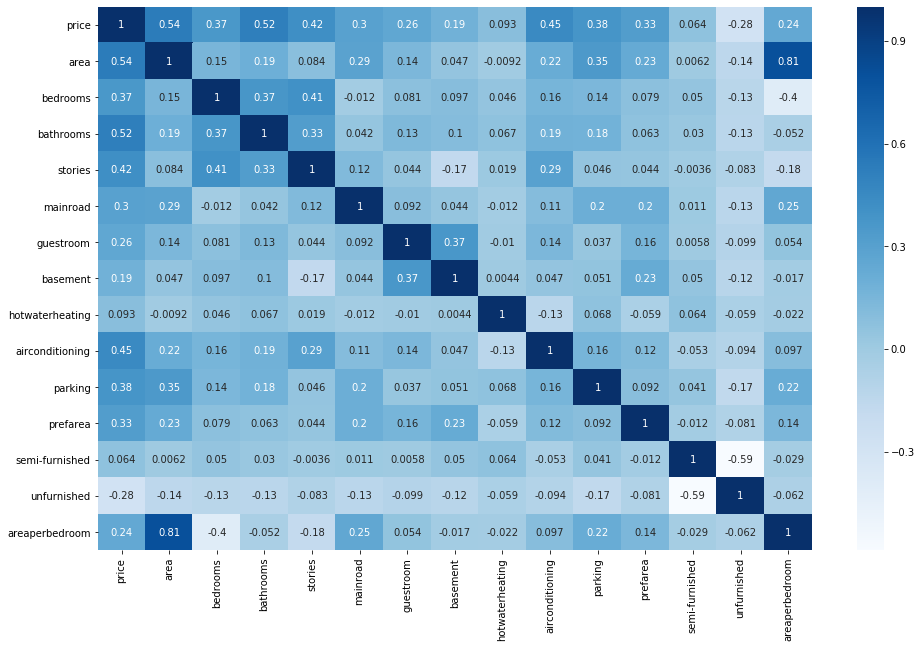

In [37]:
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(housing.drop(['bbratio'] , axis = 1).corr(),annot = True , cmap = 'Blues')

In [38]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('bedrooms', 1)

In [39]:
lm_3 = sm.OLS(y_train,X_train).fit()

In [40]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           1.66e-83
Time:                        14:35:05   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.018     

In [41]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio"], axis=1), dependent_col="price")

,Var,Vif
0,area,14.98
12,areaperbedroom,13.88
3,mainroad,6.10
2,stories,2.56
10,semi-furnished,2.04
8,parking,2.00
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.72
1,bathrooms,1.69


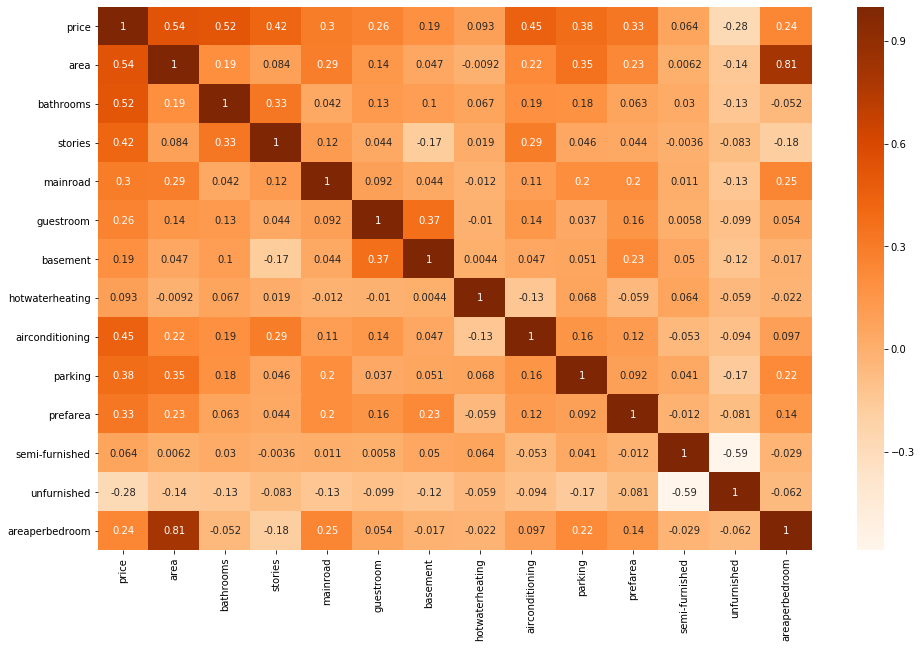

In [42]:
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(housing.drop(['bbratio' , 'bedrooms'] , axis = 1).corr(),annot = True , cmap = 'Oranges')

### Dropping the Variable and Updating the Model

In [43]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('areaperbedroom', 1)

In [44]:
# Create a fourth fitted model
lm_4 = sm.OLS(y_train,X_train).fit()

In [45]:
#Let's see the summary of our fourth linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           2.35e-83
Time:                        14:35:08   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0313      0.017     

In [46]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom"], axis=1), dependent_col="price")

,Var,Vif
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


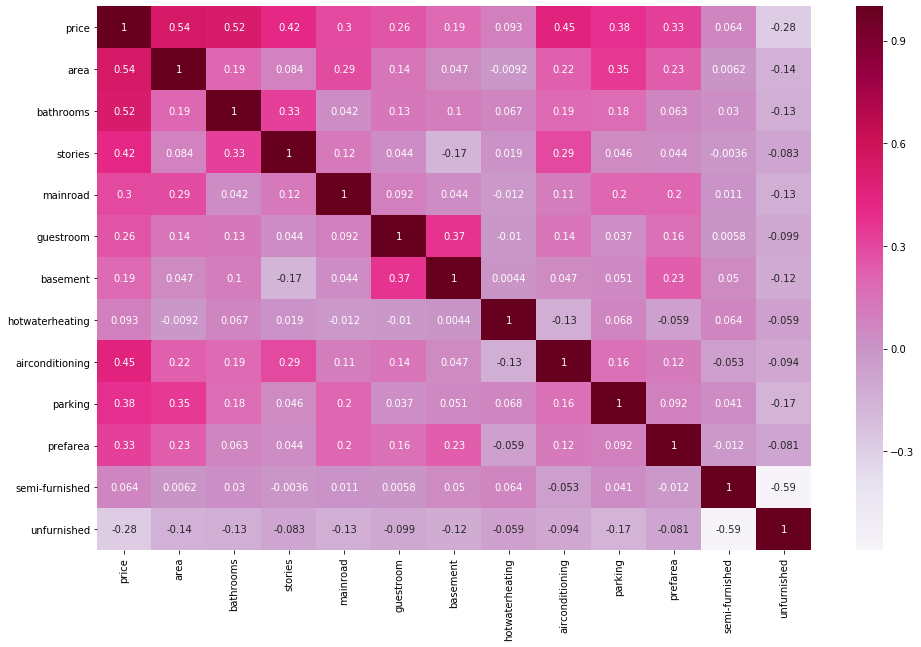

In [47]:
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(housing.drop(['bbratio' , 'bedrooms' , 'areaperbedroom'] , axis = 1).corr(),annot = True , cmap = 'PuRd')

### Dropping the Variable and Updating the Model

In [48]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('semi-furnished', 1)

In [49]:
lm_5 = sm.OLS(y_train,X_train).fit()

In [50]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           2.73e-84
Time:                        14:35:09   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015     

In [51]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished"], axis=1), dependent_col="price")

,Var,Vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


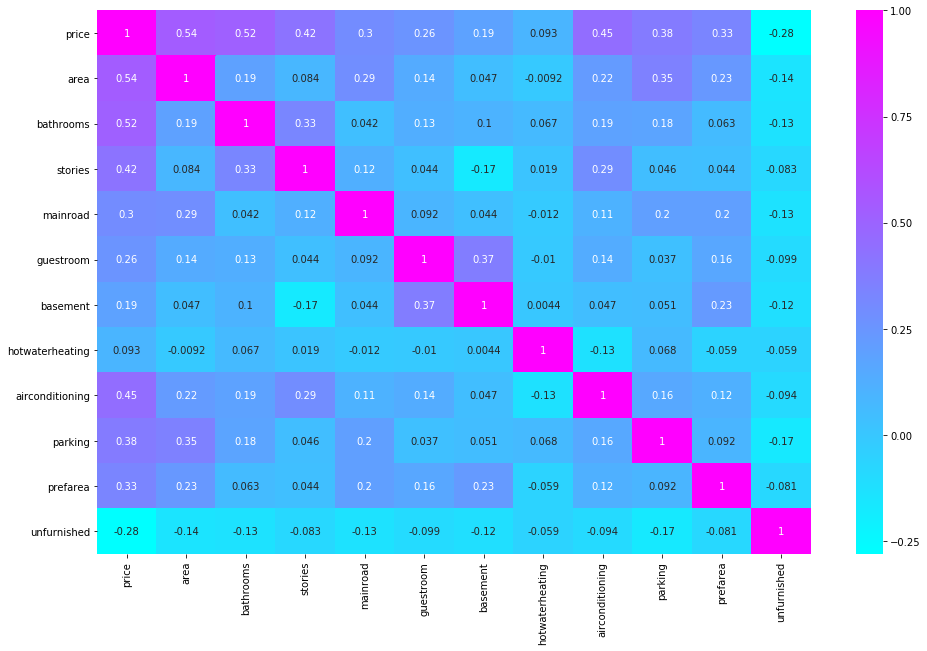

In [52]:
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(housing.drop(['bbratio' , 'bedrooms' , 'areaperbedroom' , 'semi-furnished'] , axis = 1).corr(),annot = True , cmap = 'cool')

### Dropping the Variable and Updating the Model

In [53]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('basement', 1)

In [54]:
lm_6 = sm.OLS(y_train,X_train).fit()

In [55]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           3.13e-84
Time:                        14:35:11   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0390      0.015     

In [56]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","basement"], axis=1), dependent_col="price")

,Var,Vif
3,mainroad,4.58
0,area,4.36
2,stories,2.21
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.59
8,prefarea,1.44
9,unfurnished,1.34
4,guestroom,1.29
5,hotwaterheating,1.08


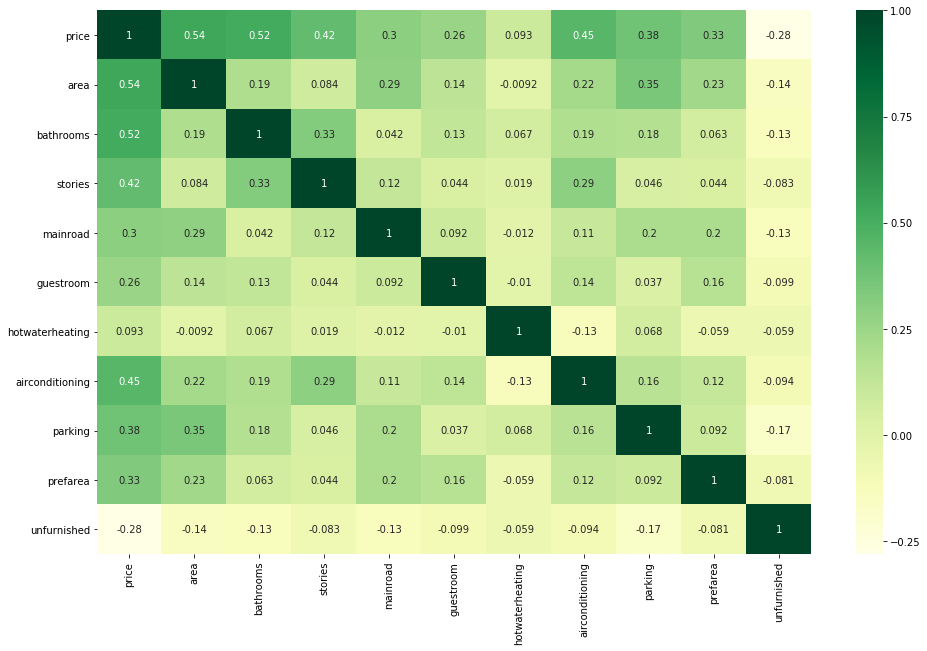

In [57]:
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(housing.drop(['bbratio' , 'bedrooms' , 'areaperbedroom' , 'semi-furnished' , 'basement'] , axis = 1).corr(),annot = True , cmap = 'YlGn')

#### Design four models by dropping all the variables one by one with high vif (>5). Then, compare the results.

## Making Predictions Using the Final Model

### Prediction with Model 6

In [69]:
# Adding  constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

In [59]:
X_test_m6 = X_test_m6.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","basement"], axis=1)

In [60]:
# Making predictions
y_pred_m6 = lm_6.predict(X_test_m6)

## Model Evaluation

Text(0, 0.5, 'Housing Price')

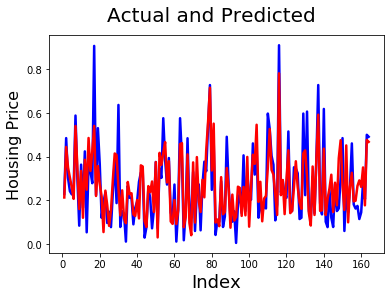

In [61]:
# Actual vs Predicted
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m6, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

Text(0, 0.5, 'y_pred')

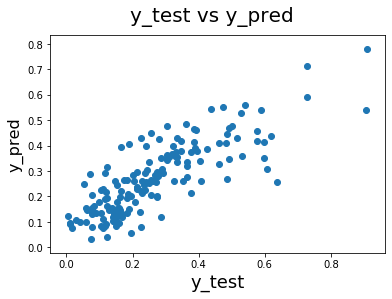

In [62]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'ytest-ypred')

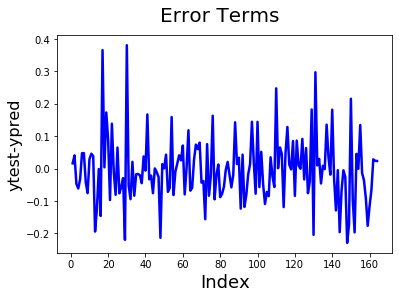

In [63]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,165,1)]
plt.plot(c,y_test-y_pred_m6, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0, 0.5, 'Index')

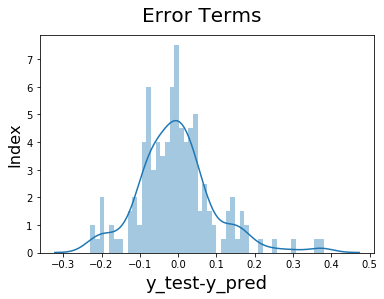

In [71]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m6),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [65]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m6)))
print('R-squared-error : ' , r2_score(y_test , y_pred_m6))

RMSE : 0.10001092336807833
R-squared-error :  0.660134403021964


In [66]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train , y_train)
p = dt.predict(X_test_m6)
ac = dt.score(X_test_m6 , y_test)
ac

0.19488520759799

Text(0, 0.5, 'y_pred')

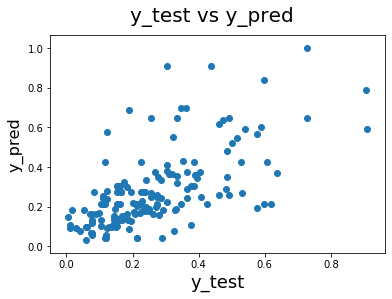

In [67]:
fig = plt.figure()
plt.scatter(y_test , p)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   